# Introduction

### Context

The main goal is to predict who is a churner and who isn't. 

The dataset was found in Kaggle at this link : https://www.kaggle.com/mnassrib/telecom-churn-datasets?select=churn-bigml-80.csv. 

The dataset is composed by data about Orange's Customers. The data were collected on the US Territory. 

The data is normally clean, however we will try to empower data throught feature engineering. 

### Explanation of the Features

**State:** USA States (list of the abreviations : https://www.ibm.com/support/knowledgecenter/fr/SSKPRS/com.ibm.help.pem.sponsor.tasks.doc/r_state_abbrev.html)

**Account Length:** Length of The Account.

**Area Code 415:** relates to San Francisco,408 is of San Jose and 510 is of City of Okland.

**International Plan:** Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan.

**Voice Mail Plan:** Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan.

**Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 50.

**Total day minutes Total:** Number of Minutes Spent By Customers in Morning

**Total day calls Total:** Number of Calls made by Customer in Morning.

**Total day charge Total:** Charge to the Customers in Morning.

**Total eve minutes Total:** Number of Minutes Spent By Customers in Evening.

**Total eve calls Total:** Number of Calls made by Customer in Evening.

**Total eve charge Total:** Charge to the Customers in Morning.

**Total night minutes Total:** Number of Minutes Spent By Customers in the Night.

**Total night calls Total:** Number of Calls made by Customer in Night.

**Total night charge Total:** Charge to the Customers in Night.

### 

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import torch
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import optuna
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder

### 

# Loading Data

In [2]:
df_orange = pd.DataFrame(pd.read_excel('Churn_Orange.xlsx'))

In [3]:
df_orange

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


### 

# Statistical Analysis 

### Classic Statistics 

In [4]:
df_orange.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Missing Values ? 

In [5]:
print ("Missing values :  ", df_orange.isnull().sum().values.sum())

Missing values :   0


#### Churn rate

In [6]:
churn_rate = df_orange[df_orange["Churn"]==True]["Churn"].value_counts()/sum(df_orange["Churn"].value_counts())*100
print("The churn rate is :","%.2f" %churn_rate,"%")

The churn rate is : 14.49 %


### Charts

#### Box-Plot

In [7]:
df_box_plot = df_orange.drop(["State","Area code"],axis = 1).copy()

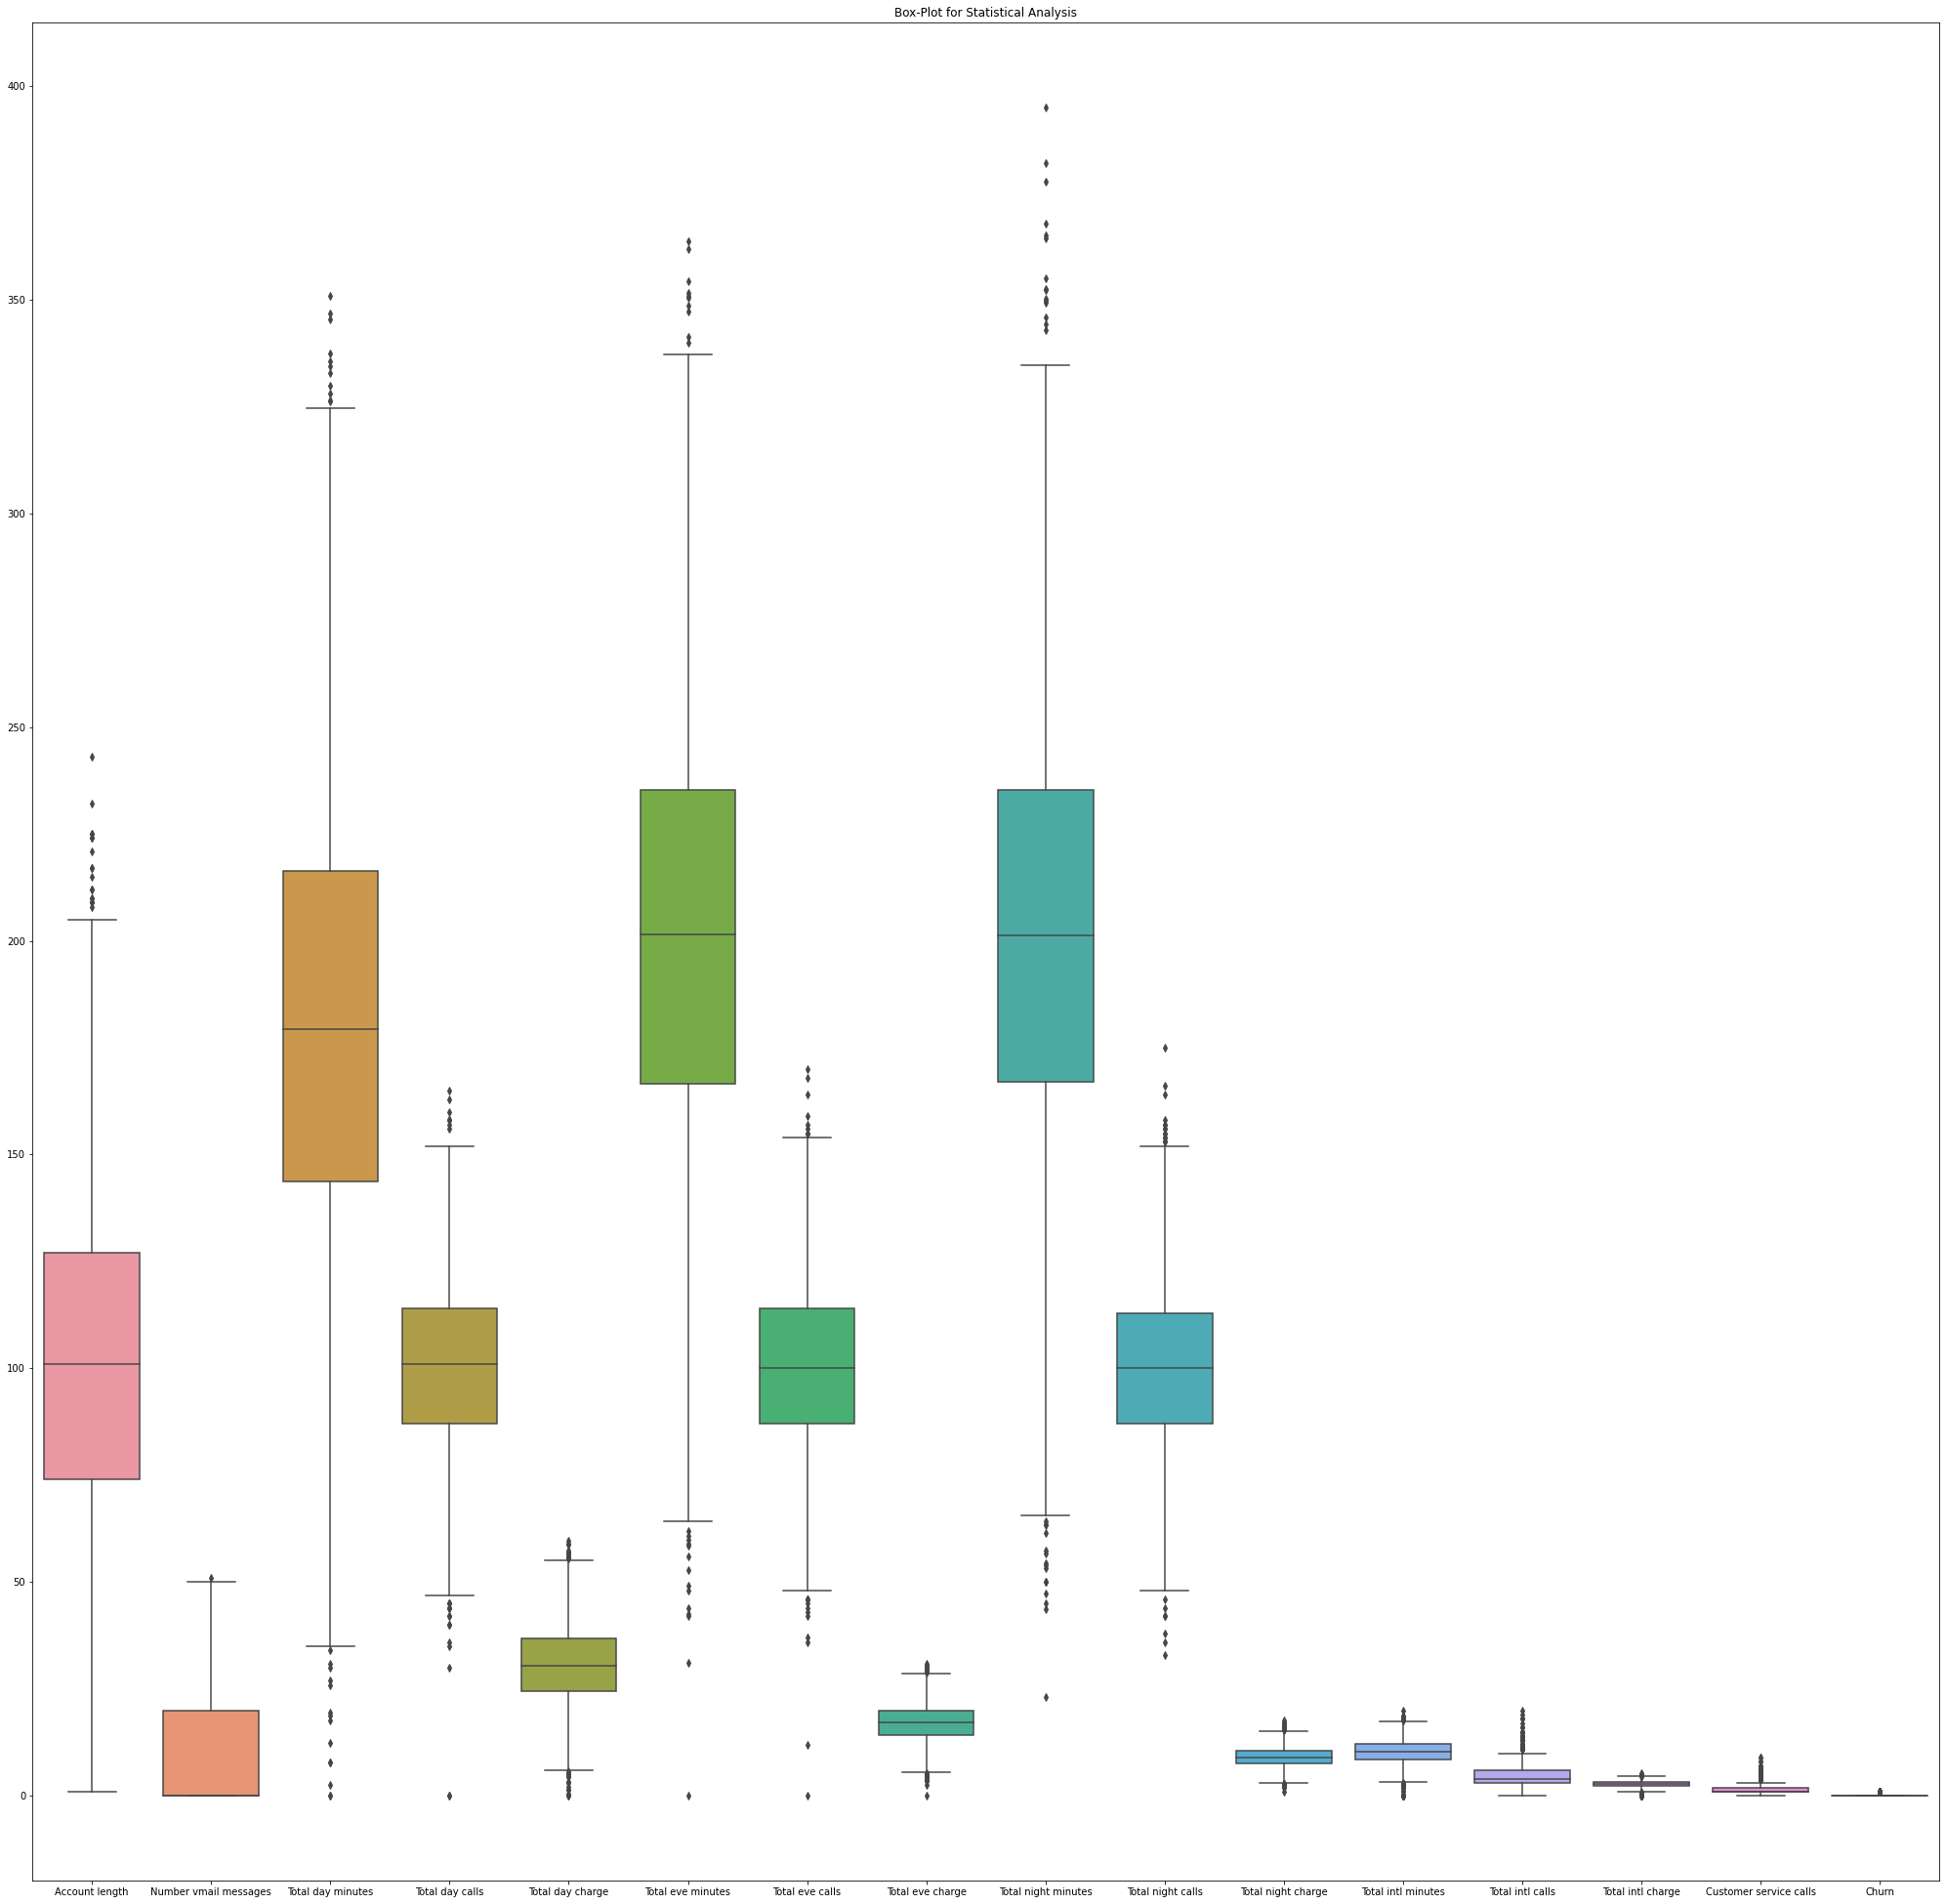

<Figure size 2520x2520 with 0 Axes>

In [9]:
sns.boxplot(data = df_box_plot)
plt.title ("Box-Plot for Statistical Analysis")
plt.figure()
plt.rc('figure', figsize=[35, 35])

**Conclusion:** There are many extreme or aberrant values in the dataset. Concerning such dataset, this is not really surprising. Indeed, many people can have a subscription since a long time and this phenomenon directly impact on extreme values. 

#### Churners vs Subscribers

In [10]:
# Percentage of Churners

In [11]:
## Creating a list of churners and subscribers
nb_churners = df_orange[df_orange["Churn"]== True]
nb_churners = nb_churners["Churn"].values.tolist()
nb_churners = len(nb_churners)

nb_subscribers = df_orange[df_orange["Churn"]== False]
nb_subscribers = nb_subscribers["Churn"].values.tolist()
nb_subscribers = len(nb_subscribers)

print("Churners:",nb_churners,"\nSubscribers:",nb_subscribers)

Churners: 483 
Subscribers: 2850


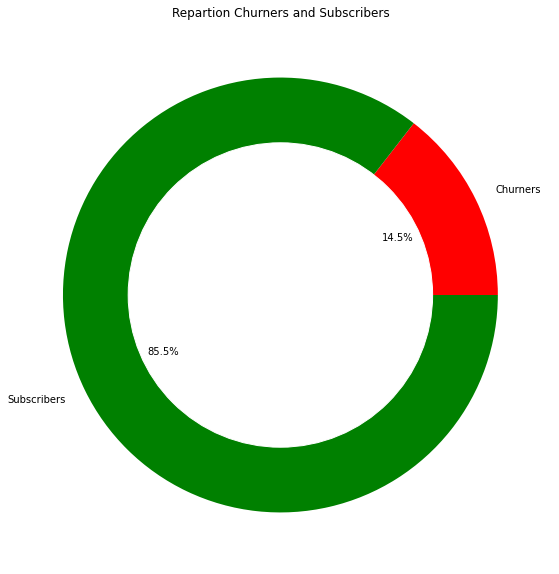

<Figure size 720x720 with 0 Axes>

In [13]:
## Plotting
size = [nb_churners, nb_subscribers]
names = "Churners","Subscribers"
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','green'],autopct="%.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Repartion Churners and Subscribers")
plt.figure()
plt.rc('figure', figsize=[10, 10])

**Conclusion** : There are few examples of churners in this dataset. Probably, proceding to a data augmentation could be a good idea. 

In [14]:
# State Analysis

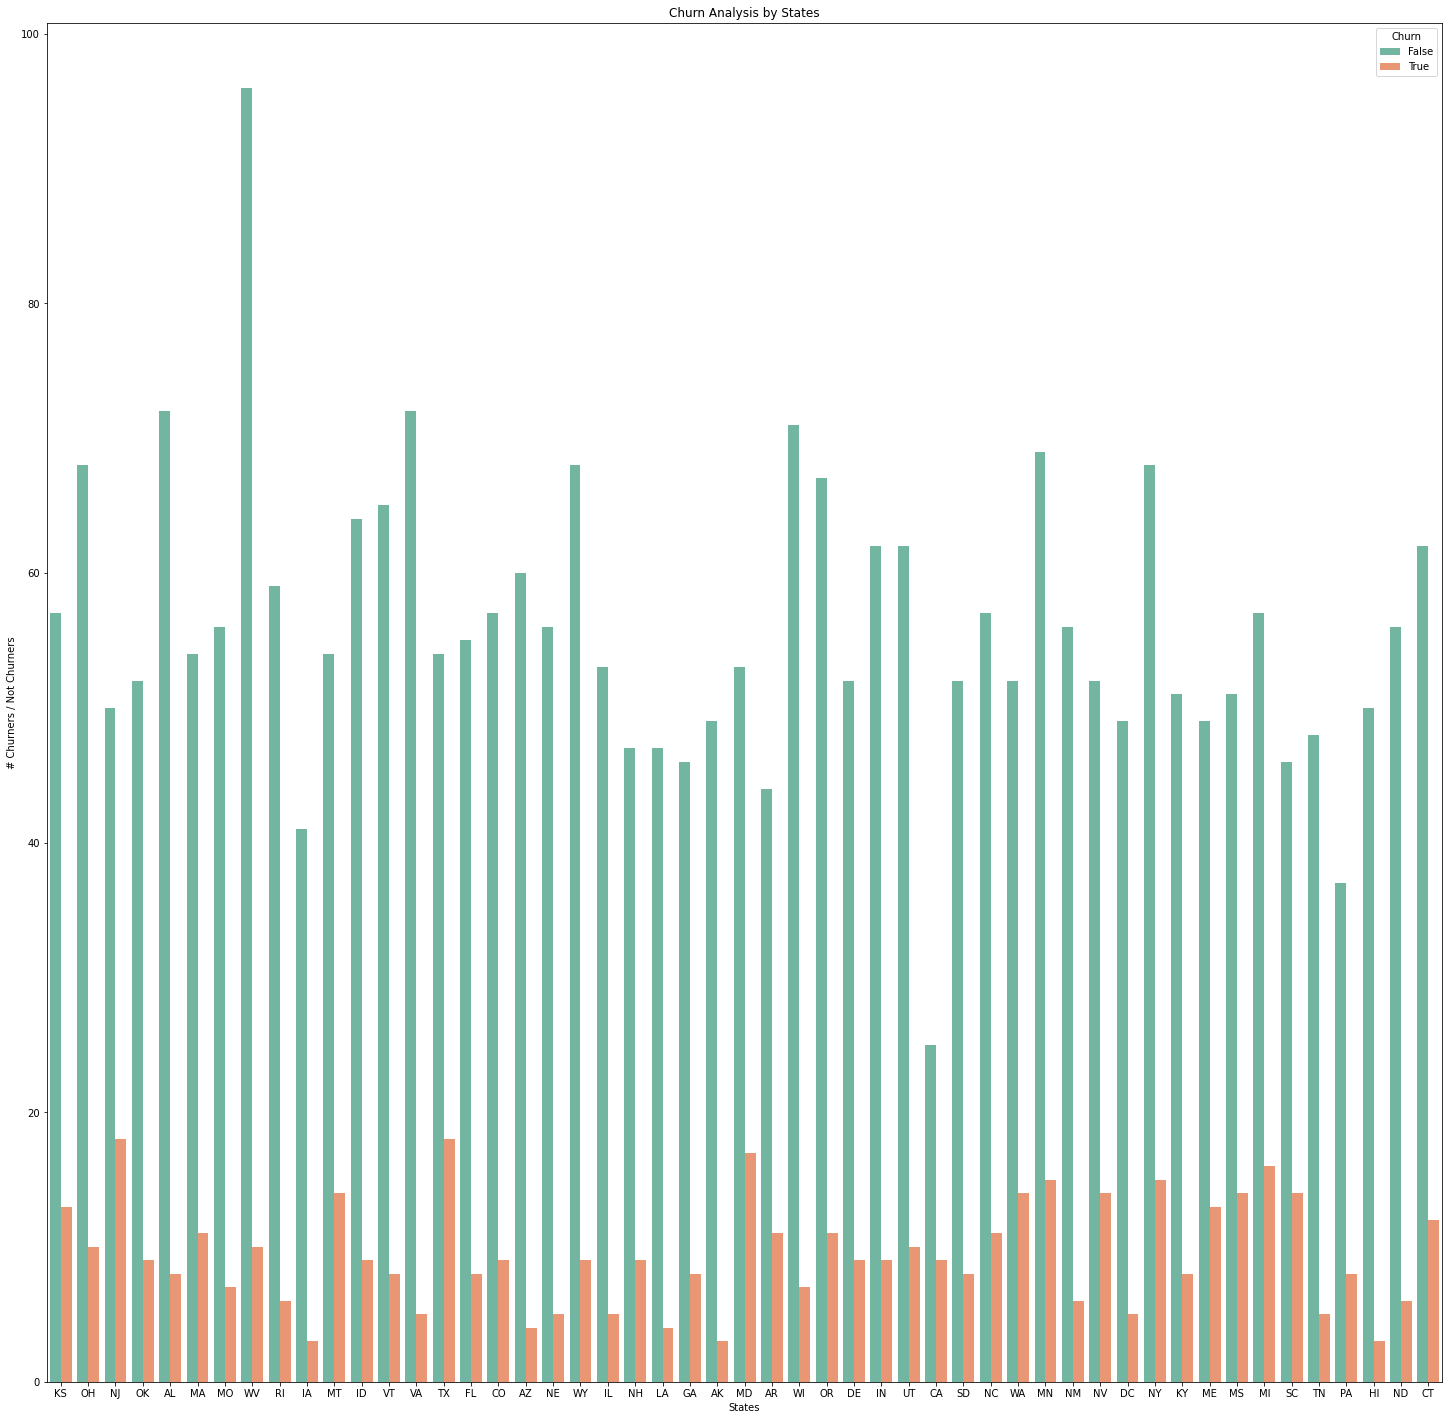

<Figure size 1800x1800 with 0 Axes>

In [16]:
plt.title("Churn Analysis by States")
sns.countplot(x = 'State', hue = 'Churn', data = df_orange, palette = 'Set2')
plt.xlabel("States")
plt.ylabel("# Churners / Not Churners")
plt.figure()
plt.rc('figure', figsize=[25, 25])

**Conclusion:** We can easily see that some states have more churners than others : Texas, New Jersey and Maryland (TX, NJ, MD) are the states with the biggest number of churners.

Missouri (MO) is the state with the more subscribers. The distribution of Orange's Subscribers in the US seems to be uniformly distributed. 

**The State is maybe an usefull feature to determine who churned and who keeped his subscription.**

In [17]:
# Customer Care Sercive 

In [18]:
## Creating dataframes for a comparison
df_orange_agg_churn = df_orange.groupby(["Churn","Customer service calls"]).agg({"Customer service calls":sum})
df_orange_agg_churn = df_orange_agg_churn.rename(columns = {"Customer service calls":"Count"})
df_orange_agg_churn = df_orange_agg_churn.reset_index()
df_orange_agg_churn_churners = df_orange_agg_churn[df_orange_agg_churn["Churn"]==True]
df_orange_agg_churn_subs = df_orange_agg_churn[df_orange_agg_churn["Churn"]==False]
### Adding one line in the dataframe of subscribers to obtain a comparable dataframe
df_orange_agg_churn_subs.loc[9]=[False,9,0]

/Users/aurelienpayet/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(0, 0.5, '#Calls')

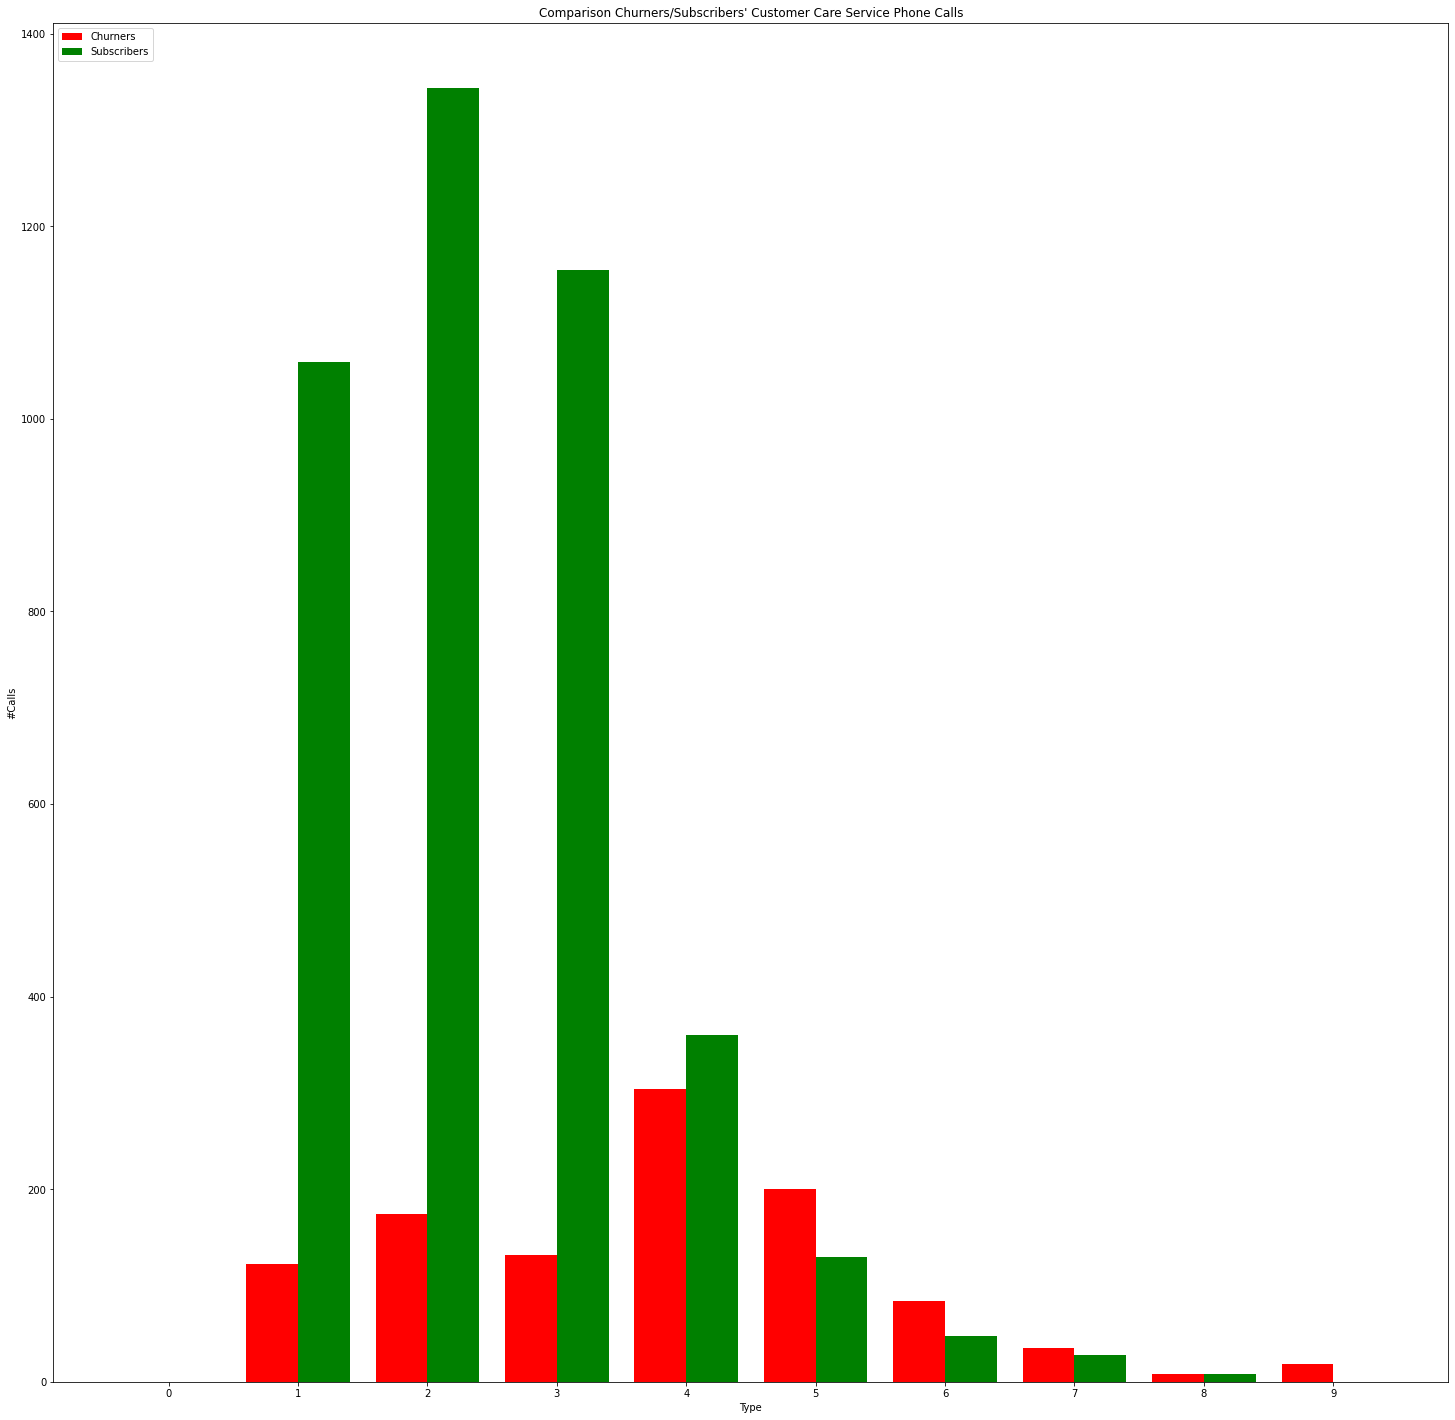

In [19]:
## Plotting
barWidth = 0.4
max_nb_phones_calls = max(df_orange["Customer service calls"].values)
r1 = range(max_nb_phones_calls+1)
r2 = [x + barWidth for x in r1]
churners_calls = list(df_orange_agg_churn_churners.Count)
subscribers_calls = list(df_orange_agg_churn_subs.Count) 
plt.title("Comparison Churners/Subscribers' Customer Care Service Phone Calls")
plt.bar(r1, churners_calls, width = barWidth, color = ['red' for i in churners_calls],linewidth = 2, label = "Churners")
plt.bar(r2, subscribers_calls, width = barWidth, color = ['green' for i in churners_calls],linewidth = 4, label = "Subscribers")
plt.xticks([r + barWidth / 2 for r in range(len(churners_calls))], ['0','1', '2', '3','4','5','6','7','8','9'])
plt.legend(loc = "upper left")
plt.xlabel("Type")
plt.ylabel("#Calls")

**Conslusion:** Current Subscribers seems to be people who call between 1 and 3 times the Customer Care Service (CCS). People who contact 5 or more times the CCS are mostly churners. 

This features will probably influence the prediction of churners. 

In [20]:
# Analysis of Options

We will analyze if having an option (International or Voice Mail) potentially influence the churn rate. 

In [21]:
## Creating an option to make the analysis
df_orange_options = df_orange.copy()
def options(df):
    if ((df["International plan"] =='Yes') & (df["Voice mail plan"] == 'Yes')):
        result = 2
    elif ((df["International plan"] =='Yes') & (df["Voice mail plan"] == 'No')):
          result = 1
    elif ((df["International plan"] =='No') & (df["Voice mail plan"] == 'Yes')):
          result = 1
    else :
          result = 0
    return result 
df_orange_options["Nb_Options"]=df_orange_options.apply(lambda row: options(row), axis = 1)

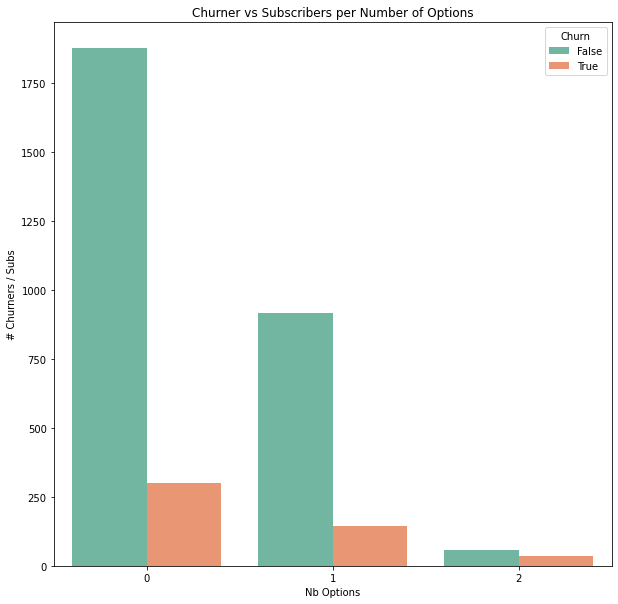

<Figure size 720x720 with 0 Axes>

In [23]:
## Plotting
plt.title("Churner vs Subscribers per Number of Options")
sns.countplot(x = 'Nb_Options', hue = 'Churn', data = df_orange_options, palette = 'Set2')
plt.xlabel("Nb Options")
plt.ylabel("# Churners / Subs")
plt.figure()
plt.rc('figure', figsize=[10, 10])

**Conclusion :** We can easily remark than few people have an option. 

However, people who have at least one option generally remain. 

Probably, options has no impact on the churn. 

In [24]:
# Analysis of Account Length

In [25]:
df_orange_churn = df_orange[df_orange["Churn"]==True]
df_orange_subs = df_orange[df_orange["Churn"]==False] 
list_account_length_churn = list(df_orange_churn["Account length"])
list_account_length_subs = list(df_orange_subs["Account length"])

## For churners
list_0_20_churn = []
list_20_40_churn = []
list_40_60_churn = []
list_60_80_churn = []
list_80_100_churn = []
list_100_120_churn = []
list_120_140_churn = []
list_140_180_churn = []
list_180_220_churn = []
list_220_260_churn = []

for i in list_account_length_churn : 
    if ((i>=0) & (i <20)) :
        list_0_20_churn.append(i)
    elif ((i>=20) & (i <40)): 
        list_20_40_churn.append(i)
    elif ((i>=40) & (i <60)): 
        list_40_60_churn.append(i)    
    elif ((i>=60) & (i <80)): 
        list_60_80_churn.append(i)
    elif ((i>=80) & (i <100)) :
        list_80_100_churn.append(i)
    elif ((i>=100) & (i <120)) :
        list_100_120_churn.append(i)
    elif ((i>=120) & (i <140)) : 
        list_120_140_churn.append(i)
    elif ((i>=140) & (i <180)):
        list_140_180_churn.append(i)
    elif ((i>=180) & (i <220)): 
        list_180_220_churn.append(i)
    else : 
        list_220_260_churn.append(i)

In [26]:
## For subscribers
list_0_20_subs = []
list_20_40_subs = []
list_40_60_subs = []
list_60_80_subs = []
list_80_100_subs = []
list_100_120_subs = []
list_120_140_subs = []
list_140_180_subs = []
list_180_220_subs = []
list_220_260_subs = []

for i in list_account_length_subs : 
    if ((i>=0) & (i <20)) :
        list_0_20_subs.append(i)
    elif ((i>=20) & (i <40)): 
        list_20_40_subs.append(i)
    elif ((i>=40) & (i <60)): 
        list_40_60_subs.append(i)    
    elif ((i>=60) & (i <80)): 
        list_60_80_subs.append(i)
    elif ((i>=80) & (i <100)) :
        list_80_100_subs.append(i)
    elif ((i>=100) & (i <120)) :
        list_100_120_subs.append(i)
    elif ((i>=120) & (i <140)) : 
        list_120_140_subs.append(i)
    elif ((i>=140) & (i <180)):
        list_140_180_subs.append(i)
    elif ((i>=180) & (i <220)): 
        list_180_220_subs.append(i)
    else : 
        list_220_260_subs.append(i)

In [27]:
## Agregation 
list_al_churn = [len(list_0_20_churn),len(list_20_40_churn),len(list_40_60_churn),len(list_60_80_churn),len(list_80_100_churn),len(list_100_120_churn),len(list_120_140_churn),len(list_140_180_churn),len(list_180_220_churn),len(list_220_260_churn)]                                                                                             
list_al_subs = [len(list_0_20_subs),len(list_20_40_subs),len(list_40_60_subs),len(list_60_80_subs),len(list_80_100_subs),len(list_100_120_subs),len(list_120_140_subs),len(list_140_180_subs),len(list_180_220_subs),len(list_220_260_subs)]
                                                                                                

Text(0, 0.5, '# Nb Users')

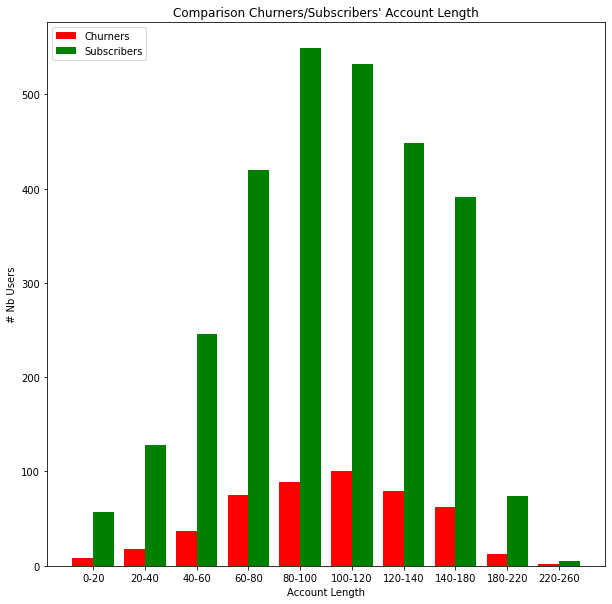

In [28]:
## Plotting
r1 = range(len(list_al_churn))
r2 = [x + barWidth for x in r1]
plt.title("Comparison Churners/Subscribers' Account Length")
plt.bar(r1, list_al_churn, width = barWidth, color = ['red' for i in list_al_churn],linewidth = 2, label = "Churners")
plt.bar(r2, list_al_subs, width = barWidth, color = ['green' for i in list_al_churn],linewidth = 4, label = "Subscribers")
plt.xticks([r + barWidth / 2 for r in range(len(list_al_churn))], ['0-20','20-40', '40-60', '60-80','80-100','100-120','120-140','140-180','180-220','220-260'])
plt.legend(loc = "upper left")
plt.xlabel("Account Length")
plt.ylabel("# Nb Users")

**Conclusion:** We can see that the churners are mostly people with an account length between 60 months and 180 months. 

It can be surprising because we could think that people with a small account length were people who tend to churn because they were in trial or did not like the service. 

In [29]:
# Other Analysis

We decided to stop here the statistical analysis because we analyzed sufficently the dataset. We succeeded in bringing out different patterns and discribing the dataset. 

### 

# One Hot Encoding

In [29]:
labelencoder = LabelEncoder()
df_orange["State"]=labelencoder.fit_transform(df_orange['State'])
df_orange["International plan"]=labelencoder.fit_transform(df_orange['International plan'])
df_orange["Voice mail plan"]=labelencoder.fit_transform(df_orange['Voice mail plan'])
df_orange["Churn"]=labelencoder.fit_transform(df_orange['Churn'])

In [30]:
df_orange

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,48,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3329,1,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
3330,46,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
3331,49,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


We encoded the different variables. 

# Analysis of the Correlation

### Correlation Matrix

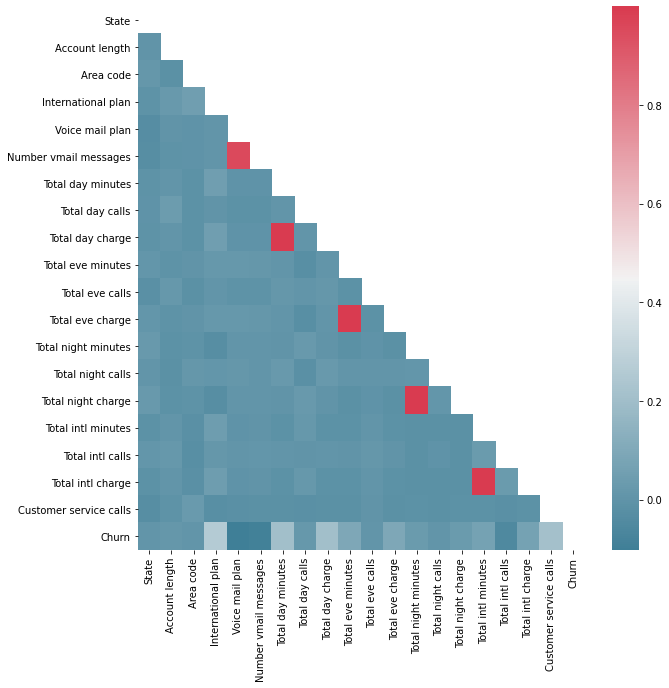

In [31]:
def plotCorrelationMatrix(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(225, 8, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap)
    plt.rc('figure', figsize=[30, 30])

data_correlation = df_orange.corr()
plotCorrelationMatrix(data_correlation)

### 

# Train Test Split

In [32]:
orange_result = df_orange["Churn"]
orange_features = df_orange.drop(["Churn"],axis = 1)

In [33]:
X,y = orange_features, orange_result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2222, 19) (1111, 19) (2222,) (1111,)


### 

# Prediction

Let's start the most interesting part : the prediction ! 

To make the better prediction possible, **we will use differents models** such as Logistic Regression, Decision Trees, Random Forest, Boosting, SVMs,... 

To evaluate our prediction, we will use different metrics such as **accuracy, f1-score or the ROC Curve**. 

When the best model will be found, **we will try to tune it** more thanks to specific feature engineering, modification of the paramaeters, etc.  

### Scaling 

Before starting, we will transform our X_train and X_test datasets. 

We **will scal them and create Z_train and Z_test**. These new dataframes will be probably used in several modelisations. 

In [34]:
stds = preprocessing.StandardScaler()
Z_train = stds.fit_transform(X_train)
Z_test = stds.transform(X_test)

### Usefull for the Neural Networks

#### Tensors 

In [35]:
tensor_ZTrain = torch.FloatTensor(Z_train)
tensor_yTrain = torch.FloatTensor(list(y_train))
tensor_ZTest = torch.FloatTensor(Z_test)
tensor_yTest = torch.FloatTensor(list(y_test))

#### Training function

In [36]:
def train_session(X,y,classifier,criterion,optimizer,n_epochs=10000):
    losses = np.zeros(n_epochs)
    for iter in range(n_epochs):
        y_pred = classifier(X)
        perte = criterion(y_pred.squeeze(),y)
        losses[iter] = perte.item()
        perte.backward()
        optimizer.step()
    return losses

#mlp.train()
#epoch = 10000
#for epoch in range(epoch):
    #optimizer.zero_grad()
    #y_pred = mlp(tensor_ZTrain)
    #loss = criterion(y_pred.squeeze(), tensor_yTrain)
   
    #print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    #loss.backward()
    #optimizer.step()

#### Testing

In [37]:
def test_session(X,y,classifier):
    tensor_proba = classifier(X)
    proba = tensor_proba.squeeze().detach().numpy()
    pred = np.where(proba > 0.5, 1, 0)
    yobs = y.detach().numpy()
    mc = metrics.confusion_matrix(yobs,pred)
    acc = metrics.accuracy_score(yobs,pred)
    return proba, mc, acc, pred

### Neural Network : Perceptron

#### Creation of the Perceptron

In [38]:
class Perceptron(torch.nn.Module):
    def __init__(self,p):
        super(Perceptron,self).__init__()
        self.layer1 = torch.nn.Linear(p,1)
        self.ft1 = torch.nn.Sigmoid()
    def forward(self,x):
        comb_lin = self.layer1(x)
        proba = self.ft1(comb_lin)
        return proba

In [39]:
# Choosing a criterion for gradient descent 
critere_perceptron = torch.nn.BCEWithLogitsLoss()

In [40]:
# Instanciation
ps = Perceptron(tensor_ZTrain.shape[1])

In [41]:
# Optimization
optimiseur_ps = torch.optim.Adam(ps.parameters())

#### Training

In [42]:
pertes = train_session(tensor_ZTrain,tensor_yTrain,ps,critere_perceptron,optimiseur_ps)

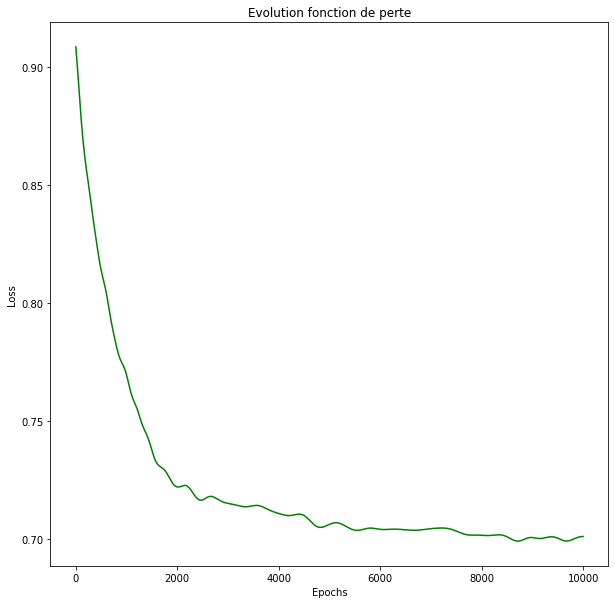

<Figure size 720x720 with 0 Axes>

In [44]:
plt.plot(np.arange(0,pertes.shape[0]),pertes,color = "green") 
plt.title("Evolution fonction de perte") 
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.figure()
plt.rc('figure', figsize=[10, 10])

#### Prediction

In [45]:
proba, mc, acc, y_pred = test_session(tensor_ZTest,tensor_yTest,ps)

#### Statistics

In [46]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       957
           1       0.56      0.58      0.57       154

    accuracy                           0.88      1111
   macro avg       0.75      0.75      0.75      1111
weighted avg       0.88      0.88      0.88      1111



In [47]:
print(mc)

[[888  69]
 [ 65  89]]


#### Network Parameters

In [48]:
print(ps.layer1.weight)

Parameter containing:
tensor([[ 0.2310,  0.0635, -0.3639, 11.4317, -5.1321, -0.1012,  3.7223,  0.5887,
          3.8514,  2.0290, -0.1977,  1.6666,  1.0205, -0.5740,  1.1854,  0.1130,
          0.4251,  0.8439, -1.2150]], requires_grad=True)


In [49]:
print(ps.layer1.bias)

Parameter containing:
tensor([-10.9838], requires_grad=True)


### Neural Network : Multi-Layer Perceptron

#### Creation of the Multi-Layer Perceptron

In [50]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP,self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.layer1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.ft1 = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(self.hidden_size,1)
        self.ft2 = torch.nn.Sigmoid()
    # Exit of the network
    def forward(self,x):
        # First Linear Combination
        comb_lin_1 = self.layer1(x)
        out_1 = self.ft1(comb_lin_1)
        # Second Linear Combination
        comb_lin_2 = self.layer2(out_1)
        out_2 = self.ft2(comb_lin_2)
        return out_2

In [51]:
# Selection of a loss function
criterion_MLP = torch.nn.BCEWithLogitsLoss()

In [52]:
# Creation of the MLP
mlp = MLP(19, 10)

In [53]:
# Selection of an optimizer of loss
optim_mlp = torch.optim.Adam(mlp.parameters())

#### Training

In [54]:
pertes_mlp = train_session(tensor_ZTrain,tensor_yTrain,mlp,criterion_MLP,optim_mlp)

Text(0, 0.5, 'Loss')

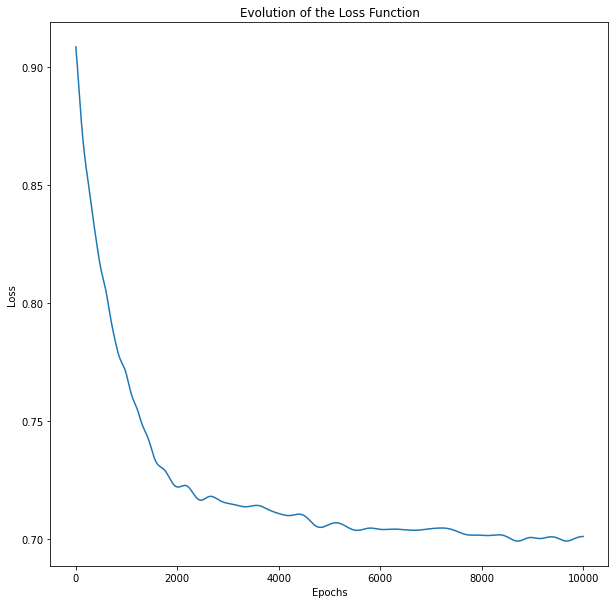

In [55]:
plt.plot(np.arange(0,pertes.shape[0]),pertes) 
plt.title("Evolution of the Loss Function") 
plt.xlabel("Epochs")
plt.ylabel("Loss")

#### Prediction

In [56]:
proba,mc,acc, y_pred = test_session(tensor_ZTest,tensor_yTest,mlp)

#### Statistics

In [57]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       957
           1       0.00      0.00      0.00       154

    accuracy                           0.86      1111
   macro avg       0.43      0.50      0.46      1111
weighted avg       0.74      0.86      0.80      1111



/Users/aurelienpayet/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print(mc)

[[957   0]
 [154   0]]


#### Network Parameters

In [59]:
print(mlp.layer1.weight)

Parameter containing:
tensor([[-10.4530,  10.4194, -10.4332, -10.4781,  10.1053,   9.9865, -10.2360,
          10.4749, -10.2552,  10.4146,   9.5055,  10.3207, -10.0142, -10.4334,
          -9.7597, -10.1585,  10.4279,  -9.7448,  10.7364],
        [ 10.3967,  10.3908, -10.4837, -10.2140, -10.4954, -10.3241, -10.0347,
         -10.3986, -10.3450, -10.2635,   9.9390, -10.3887,   8.8425,  10.2065,
           8.9442, -10.1003,  10.3544,  -9.9244, -10.1530],
        [-10.4599, -10.3853,  10.4450, -10.2789,  10.1712,  10.1874,  10.5004,
          10.4125,  10.3517,  10.0476,  10.1231,  10.3554, -10.2721,  10.4009,
         -10.0272, -10.1181,  10.3564, -10.3567, -10.0844],
        [  9.9615,  10.2006,  10.2201,  10.3453,   9.9053,   9.9231,  -9.9231,
          -9.8179,  -9.9702,  -8.7507,   9.9290,  -9.0918,  -9.9798,   9.7727,
          -9.7845,  10.0892,  10.0158,   9.8556,  10.1247],
        [ 10.0224,  10.1551, -10.0125,   9.8758,   9.9623,   9.9659,   9.9195,
           9.9304,   9.8749

In [60]:
print(mlp.layer1.bias)

Parameter containing:
tensor([ 10.3919,  10.4841,  10.4614,  -9.8922, -10.1742,  10.0928,  -9.6417,
         10.3995,  10.4482,  10.3264], requires_grad=True)


**Essayer de trouver les paramètres de tuning pour ses algos + essayer d'automatiser au max, par exemple les valeurs des couches d'entrée + bon modèle pour les RN multicouches. Voir pour ajout affichage loss.**

# Test